In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [121]:
# Do MLR, SLR and logR with gradient descent in each choosing abalone or diabetes of titanic

df = pd.read_excel("abalone.xlsx")
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [122]:
df.corr()

C:\Users\ragas\AppData\Local\Temp\ipykernel_18116\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


## SLR

In [123]:
x = df.Length
y = df.Diameter
xbar = np.mean(x)
ybar = np.mean(y)
df["xi-xbar"] = df.Length - xbar
df["yi-ybar"] = df.Diameter - ybar
df["xi-xbar_sqr"] = df["xi-xbar"] ** 2
df["mul_xi-xbar_yi-ybar"] = df["xi-xbar"] * df["yi-ybar"]
num = sum(df["mul_xi-xbar_yi-ybar"])
denom = sum(df["xi-xbar_sqr"])

b1 = num / denom
b0 = ybar - b1 * xbar

In [124]:
b1

0.8154606917560916

In [125]:
b0

-0.019413705519974678

### Gradient descent

In [126]:
b0 = 0
b1 = 0
alpha = 0.03
m = df.shape[0]

cfl = []
b0l = []
b1l = []

def model(b0, b1):
    return b1 * x + b0 - y

def cf(b0, b1):
    return (1/ (2*m)) * np.sum(np.power(model(b0, b1), 2))

for i in range(11000):
    db0 = (1/m) * np.sum(model(b0, b1))
    db1 = (1/m) * np.sum((model(b0, b1) @ x))
    b0 = b0 - alpha * db0
    b1 = b1 - alpha * db1
    b0l.append(b0)
    b1l.append(b1)
    cfl.append(cf(b0, b1))

df_ = pd.DataFrame({"b0": b0l, "b1": b1l, "cf": cfl})
df_

i = cfl.index(min(cfl))
b0m = b0l[i]
b1m = b1l[i]
print(b0l[i])
print(b1l[i])
print(i)


-0.011172531795098277
0.7999105104957175
10999


In [128]:
print(min(cfl))

0.0001307470138388257


-0.011172531795098277
0.7999105104957175


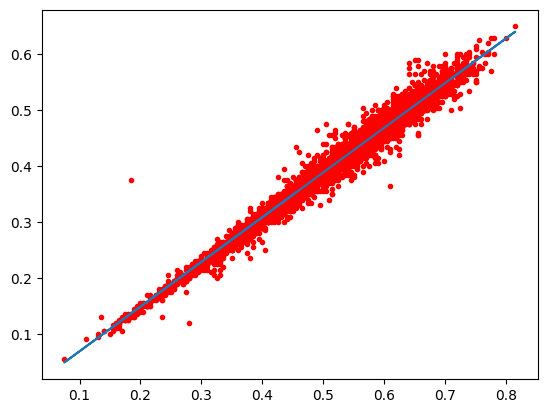

In [127]:
print(b0)
print(b1)
plt.plot(x,y,"r.")
plt.plot(x, b0m + b1m * x)
plt.show()

## MLR

In [140]:
df = pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [141]:
df.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [142]:
df.corr()

C:\Users\ragas\AppData\Local\Temp\ipykernel_18116\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [145]:
df = df[['Glucose', 'SkinThickness', 'DiabetesPedigreeFunction']].mask(df == 0, df.mean(), axis=1)

KeyError: "None of [Index(['Glucose', 'SkinThickness', 'DiabetesPedigreeFunction'], dtype='object')] are in the [columns]"

In [68]:
df

,Glucose,SkinThickness,DiabetesPedigreeFunction
0,148.0,35.000000,0.627
1,85.0,29.000000,0.351
2,183.0,20.536458,0.672
3,89.0,23.000000,0.167
4,137.0,35.000000,2.288
...,...,...,...
763,101.0,48.000000,0.171
764,122.0,27.000000,0.340
765,121.0,23.000000,0.245
766,126.0,20.536458,0.349


In [69]:
df.isna().any()

Glucose                     False
SkinThickness               False
DiabetesPedigreeFunction    False
dtype: bool

In [70]:
df.corr()

,Glucose,SkinThickness,DiabetesPedigreeFunction
Glucose,1.000000,0.160766,0.137106
SkinThickness,0.160766,1.000000,0.154961
DiabetesPedigreeFunction,0.137106,0.154961,1.000000


In [71]:
x1 = df.Glucose
x2 = df.SkinThickness
y = df.DiabetesPedigreeFunction

x1_mean = np.mean(x1)
x2_mean = np.mean(x2)
y_mean = np.mean(y)

df["X1"] = x1 - x1_mean
df["X2"] = x2 - x2_mean
df["Y"] = y - y_mean

df["X1_sqr"] = df["X1"] ** 2
df["X2_sqr"] = df["X2"] ** 2
df["X1_Y"] = df["X1"] * df["Y"]
df["X2_Y"] = df["X2"] * df["Y"]
df["X1_X2"] = df["X1"] * df["X2"]

df

,Glucose,SkinThickness,DiabetesPedigreeFunction,X1,X2,Y,X1_sqr,X2_sqr,X1_Y,X2_Y,X1_X2
0,148.0,35.000000,0.627,26.318395,8.393521,0.155124,692.657914,70.451191,4.082607,1.302034,220.903995
1,85.0,29.000000,0.351,-36.681605,2.393521,-0.120876,1345.540147,5.728942,4.433937,-0.289320,-87.798184
2,183.0,20.536458,0.672,61.318395,-6.070021,0.200124,3759.945563,36.845154,12.271264,-1.214755,-372.203938
3,89.0,23.000000,0.167,-32.681605,-3.606479,-0.304876,1068.087307,13.006692,9.963847,1.099530,117.865529
4,137.0,35.000000,2.288,15.318395,8.393521,1.816124,234.653225,70.451191,27.820100,15.243672,128.575267
...,...,...,...,...,...,...,...,...,...,...,...
763,101.0,48.000000,0.171,-20.681605,21.393521,-0.300876,427.728786,457.682731,6.222605,-6.436803,-442.452347
764,122.0,27.000000,0.340,0.318395,0.393521,-0.131876,0.101375,0.154859,-0.041989,-0.051896,0.125295
765,121.0,23.000000,0.245,-0.681605,-3.606479,-0.226876,0.464585,13.006692,0.154640,0.818225,2.458194
766,126.0,20.536458,0.349,4.318395,-6.070021,-0.122876,18.648535,36.845154,-0.530628,0.745862,-26.212748


In [72]:
sum_x1_sqr = sum(df["X1_sqr"])
sum_x2_sqr = sum(df["X2_sqr"])
sum_x1_y = sum(df["X1_Y"])
sum_x2_y = sum(df["X2_Y"])
sum_x1_x2 = sum(df["X1_X2"])
sqr_sum_x1_x2 = sum_x1_x2 ** 2

In [73]:
b1 = (sum_x2_sqr * sum_x1_y - sum_x1_x2 * sum_x2_y) / (sum_x1_sqr * sum_x2_sqr - sqr_sum_x1_x2)
b2 = (sum_x1_sqr * sum_x2_y - sum_x1_x2 * sum_x1_y) / (sum_x2_sqr * sum_x1_sqr - sqr_sum_x1_x2)

In [75]:
b1_x1_mean = b1 * x1_mean
b2_x2_mean = b2 * x2_mean
b0 = y_mean - b1_x1_mean - b2_x2_mean

print(b0)

0.1944284353758791


In [76]:
print(b1)
print(b2)


0.0012537546722907367
0.004693931310616348


In [146]:
sns.lmplot(x = 'Glucose', y = 'DiabetesPedigreeFunction', data = df, order = 2, hue=['red', 'green'])
plt.show()

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3,) + inhomogeneous part.

In [ ]:
sns.lmplot(x = 'SkinThickness', y = 'DiabetesPedigreeFunction', data = df, order = 2, ci = None)
plt.show()

## Logistic regression

In [129]:
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [130]:
df_ = df.iloc[:,:-1].mask(df == 0, df.mean(), axis=1)
df_['Outcome'] = df.Outcome


In [131]:
df_

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.000000,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2.000000,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5.000000,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1.000000,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [132]:
df_.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.152568,0.253275,0.045776,-0.016738,0.097663,-0.010297,0.525261,0.247971
Glucose,0.152568,1.000000,0.219666,0.160766,0.396597,0.231478,0.137106,0.266600,0.492908
BloodPressure,0.253275,0.219666,1.000000,0.134155,0.010926,0.281231,0.000371,0.326740,0.162986
SkinThickness,0.045776,0.160766,0.134155,1.000000,0.240361,0.535703,0.154961,0.026423,0.175026
Insulin,-0.016738,0.396597,0.010926,0.240361,1.000000,0.189856,0.157806,0.038652,0.179185
BMI,0.097663,0.231478,0.281231,0.535703,0.189856,1.000000,0.153508,0.025748,0.312254
DiabetesPedigreeFunction,-0.010297,0.137106,0.000371,0.154961,0.157806,0.153508,1.000000,0.033561,0.173844
Age,0.525261,0.266600,0.326740,0.026423,0.038652,0.025748,0.033561,1.000000,0.238356
Outcome,0.247971,0.492908,0.162986,0.175026,0.179185,0.312254,0.173844,0.238356,1.000000


In [ ]:
x = df.Glucose
y = df.Outcome

def model(b0, b1):
    return b1 * x + b0

def logfn(b0, b1):
    return (1 / (1 + np.power(np.e,  model(b0, b1))))